In [1]:
# Importando bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Modules.Helper import Helper
from Modules.Solvers import Solvers
from Modules.Plotters import Plotters
import pandas as pd
from Modules.Equation import Equation
from Modules.PyGADEvolutionEstrategyGRN5 import PyGAD_EvolutionStrategy_GRN5
import warnings
warnings.simplefilter('ignore')

In [2]:
# Carregando dados (df = dataframe & max_data = máximo das variáveis)
labels = ['A', 'B', 'C', 'D', 'E']
df, max_data = Helper.load_data(filename='Data/GRN5_DATA.txt', labels=labels)

In [3]:
# Definindo os limites para os coeficientes
bounds = {
    'n': (0.1, 5.0),
    'k': (0.1, 5.0),
    'tau': (0.1, 10.0)
}

In [5]:
# Configurando e rodando a estratégia evolutiva para otimizar os coeficientes
es =  PyGAD_EvolutionStrategy_GRN5(labels=labels, bounds=bounds, pop_size=50, generations=100)
best_individual = es.optimize(initial_conditions=[df[label].iloc[0] for label in labels],
                              t_span=(0, 72), 
                              t_eval=df['t'], 
                              df=df, 
                              max_data=max_data)



Generation 0, Best fitness: -0.4466351550482634
Generation 1, Best fitness: -0.38053238409069756
Generation 2, Best fitness: -0.5018301316311908
Generation 3, Best fitness: -0.3581864281114682
Generation 4, Best fitness: -0.38322969511823246
Generation 5, Best fitness: -0.3754841290071754
Generation 6, Best fitness: -0.32731783672017545
Generation 7, Best fitness: -0.306731691338764
Generation 8, Best fitness: -0.28804314295546823
Generation 9, Best fitness: -0.285718308767202
Generation 10, Best fitness: -0.27976208294068394
Generation 11, Best fitness: -0.25651991002445096
Generation 12, Best fitness: -0.2561071798526021
Generation 13, Best fitness: -0.26605337423434877
Generation 14, Best fitness: -0.2632730048850742
Generation 15, Best fitness: -0.26564461105095616
Generation 16, Best fitness: -0.25879686975284555
Generation 17, Best fitness: -0.2614557194829726
Generation 18, Best fitness: -0.2703620053229826
Generation 19, Best fitness: -0.2591182416378137
Generation 20, Best fit

In [6]:
# Construindo o dicionário de coeficientes com o melhor indivíduo
coefficients = es._build_coefficients_dict(best_individual)

# Criando a equação com os coeficientes otimizados
equation = Equation(coefficients=coefficients, labels=labels)

# Função do sistema de equações
def system(t, y):
    vals = [Solvers.norm_hardcoded(val, max_data[label]) for val, label in zip(y, labels)]
    N_A, N_B, N_C, N_D, N_E = vals
    
    dA = equation.full_eq(vals, 'A', 'E')
    dB = equation.full_eq(vals, 'B', 'A')
    dC = equation.full_eq(vals, 'C', 'B')
    dD = equation.full_eq(vals, 'D', 'C')
    dE = equation.complex_eqs(vals, 'E', [['+B', '+D'], ['+D', '+E']])
    return [dA, dB, dC, dD, dE] 

# Resolução dos métodos
results = {}
methods = ['Euler', 'RK6', 'RK45', 'RK23', 'DOP853', 'LSODA', 'BDF']
initial_conditions = [df[label].iloc[0] for label in labels]
t_span = (0, 72)
h = 0.01
t_eval = np.linspace(*t_span, int((t_span[1]-t_span[0])/h))

for method in methods:
    if method not in ['Euler', 'RK6']:
        results[method] = solve_ivp(system, t_span, initial_conditions, method=method, t_eval=df['t']).y
    else:
        results[method] = Solvers.solve_manual(fun=system, y0=initial_conditions, method=method, t_eval=df['t'], h=h)

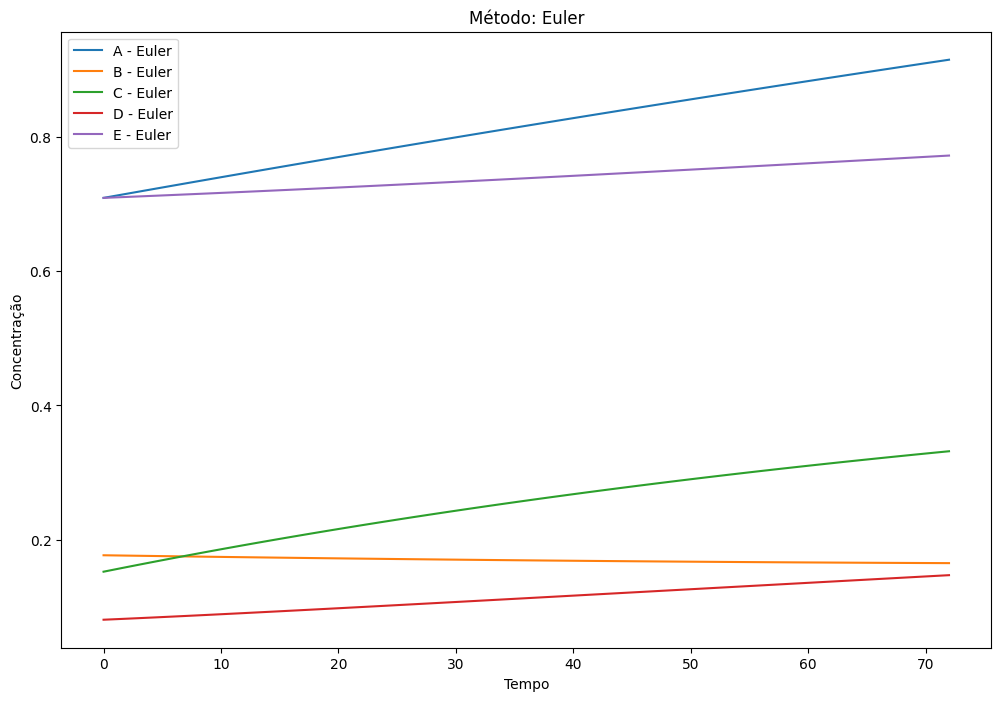

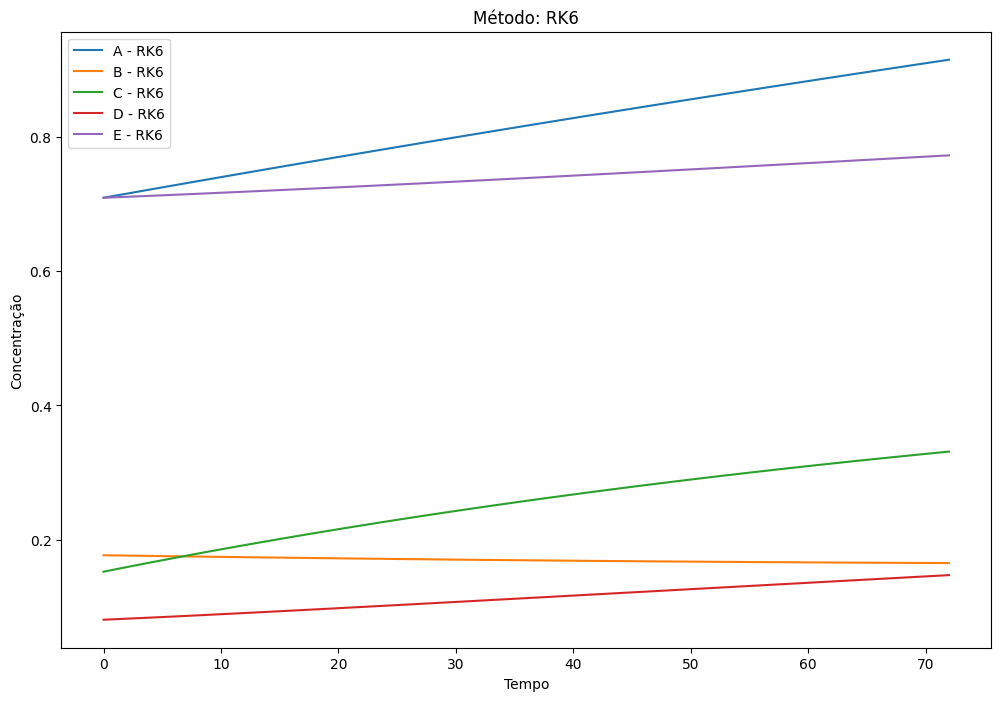

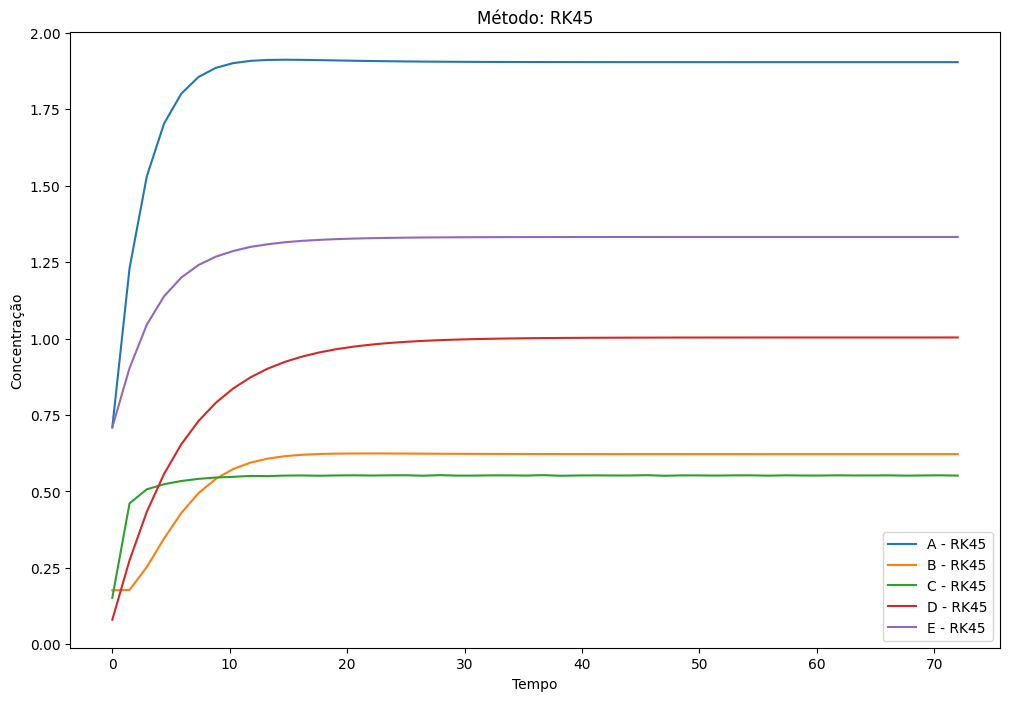

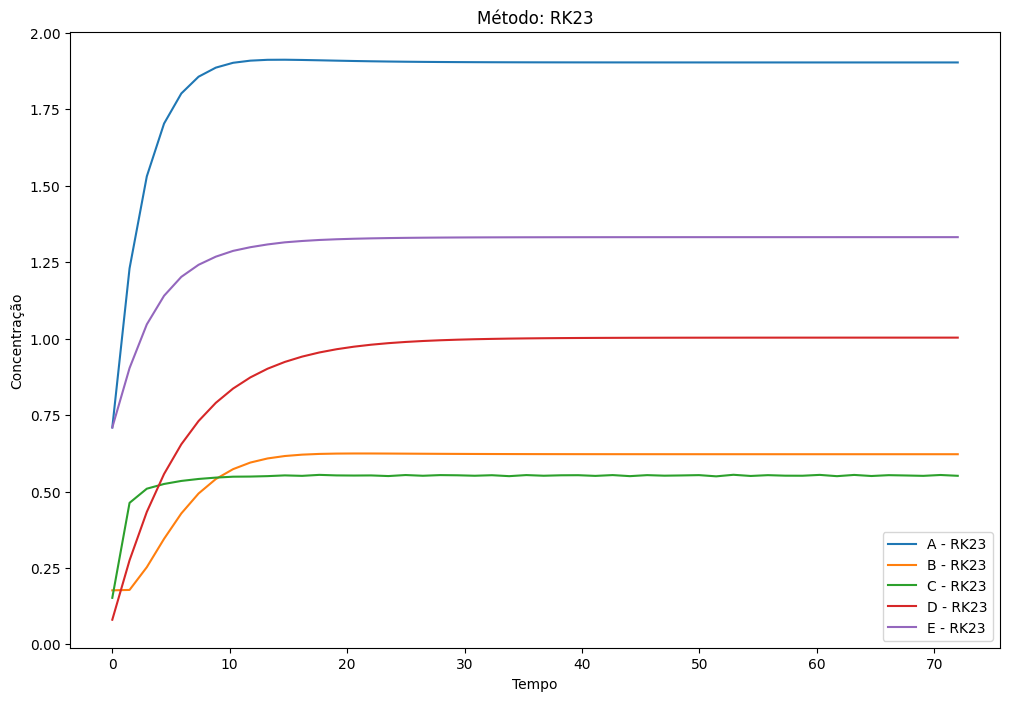

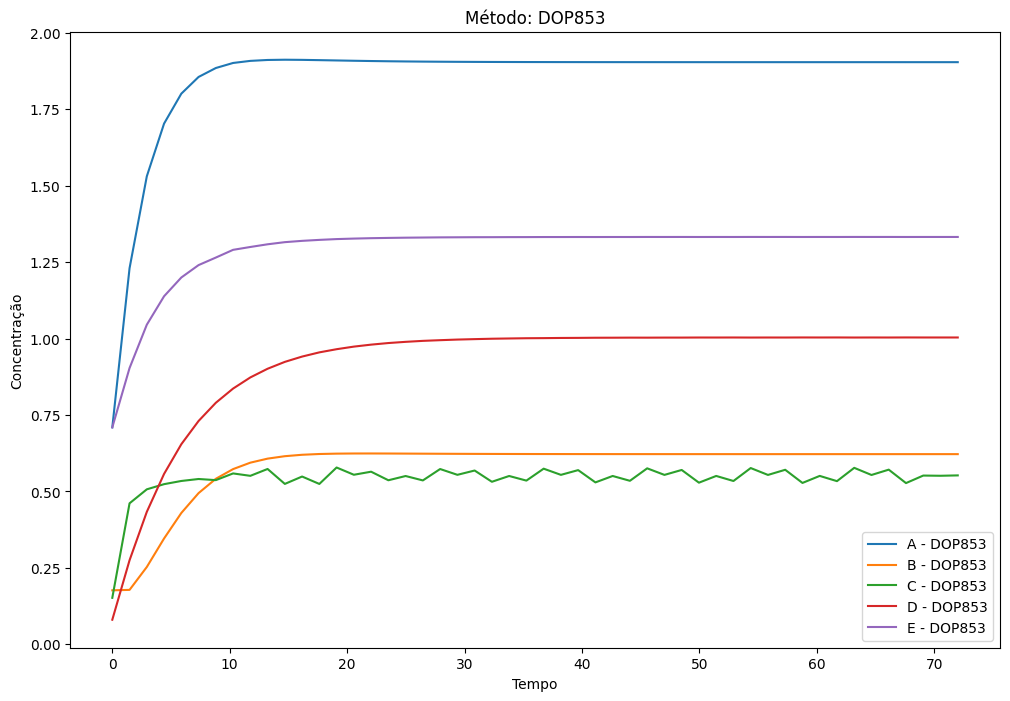

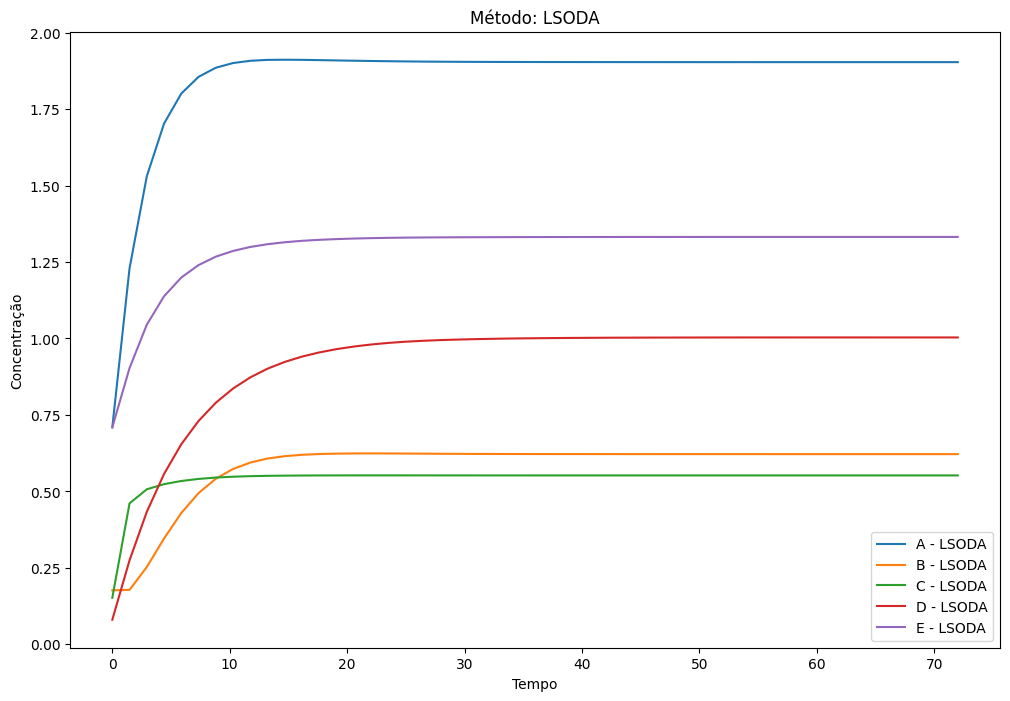

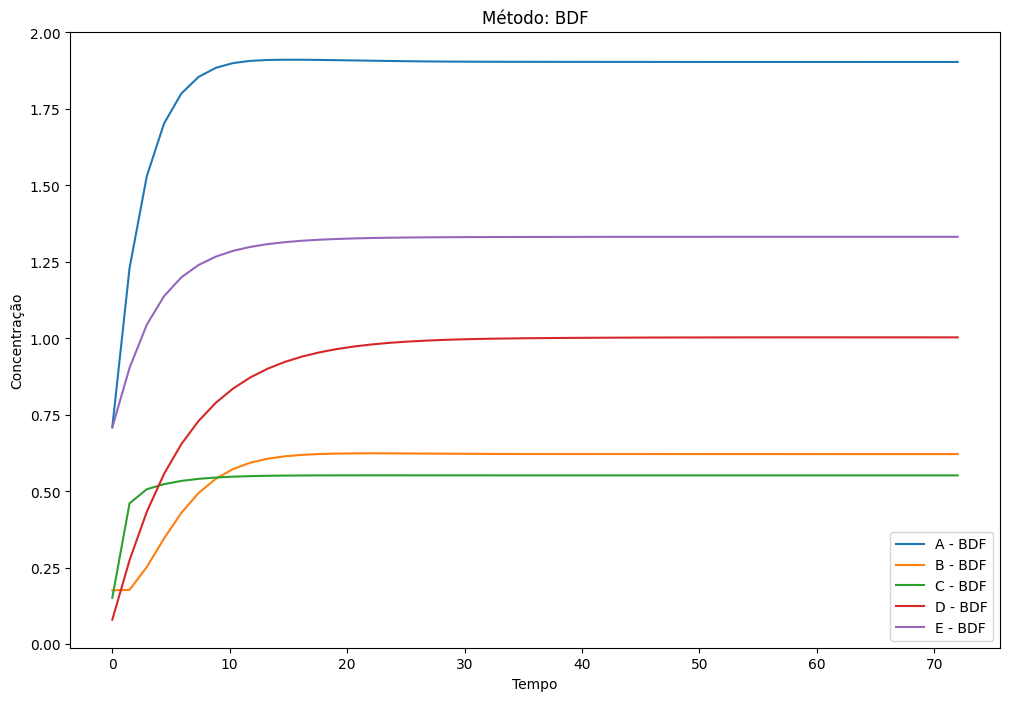

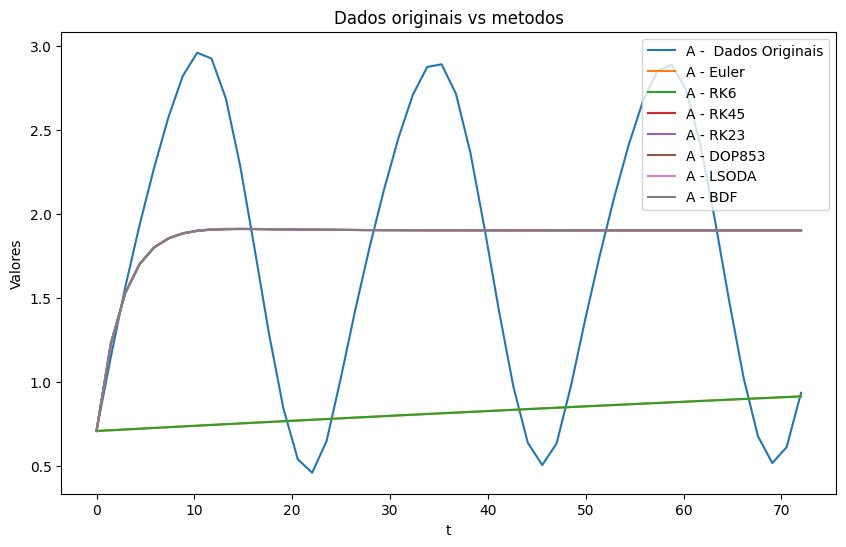

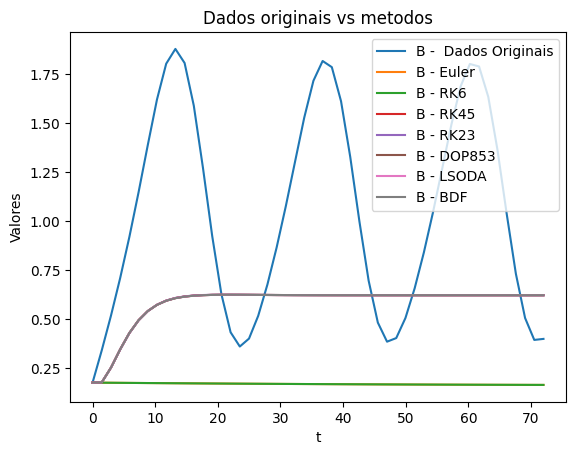

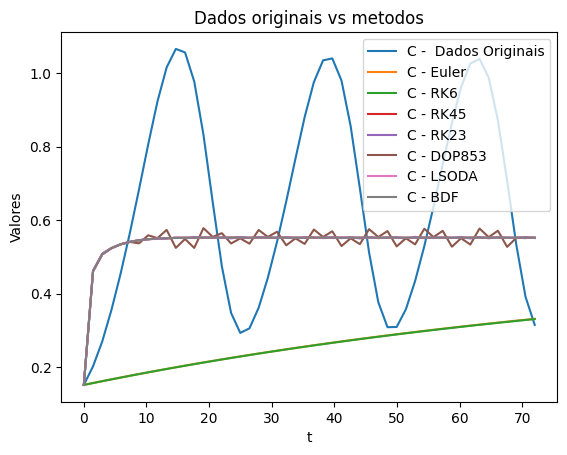

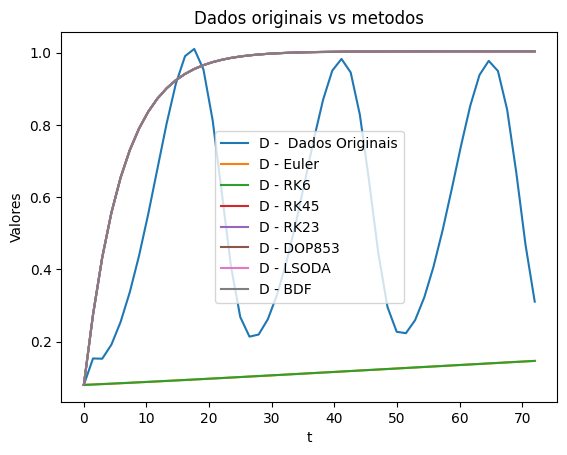

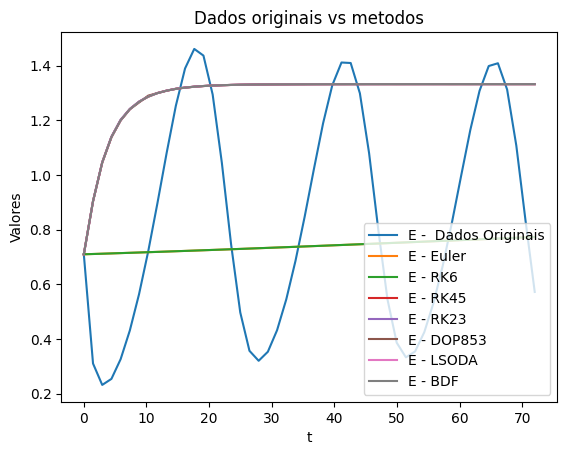

In [7]:
# Gerando os gráficos dos métodos
Plotters.plot_methods(results=results, t=df['t'], methods=methods, labels=labels)

# Comparando os resultados simulados com os dados reais
Plotters.plot_comparison(results=results, t=df['t'], df=df, methods=methods, labels=labels)

In [19]:
50

50